# Group Exercise - Creating Visualizations While Exploring Data

In [53]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def normalization(indexlist, elementlist):
    new_column = []
    for index in indexlist:
        for element in elementlist:
            if (indexlist.index(index)==elementlist.index(element)):
                new_column.append(element[0]/(avg_num_employees.loc[index].values[0]))
                
    return new_column
#with open('config.json', 'rt') as config:
 #   key = json.load(config)['key']

# Create Census DataFrame

In [ ]:
key = '16effcabd5d51ae74821b3639db3844d8c7f1beb'
url = f'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=us:*&key={key}'
url_state = f'https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F&for=state:*&key={key}'
url_bo = f'https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,OWNCHAR,OWNCHAR_LABEL,OWNPDEMP,OWNPDEMP_F&for=state:*&key={key}'

json_code = requests.get(url).json()
with open('census_data_2018.json','wt') as census:
    json.dump(json_code, census)

json_code_state = requests.get(url_state).json()
with open('census_data_2018_state.json','wt') as census2:
    json.dump(json_code_state, census2)

json_code_bo = requests.get(url_bo).json()
with open('census_data_2018_bo.json','wt') as census3:
    json.dump(json_code_bo, census3) 

In [ ]:
census_df = pd.read_json('census_data_2018.json')
census_df.rename(columns=census_df.iloc[0],inplace=True)
census_df.drop(0,inplace=True)
census_df.drop(columns=['us','NAICS2017','SEX','GEO_ID','ETH_GROUP','EMP_F','FIRMPDEMP_F','VET_GROUP','EMP_S','FIRMPDEMP_S','FIRMPDEMP_S_F','PAYANN_S','RCPPDEMP_S','RCPPDEMP_F','RCPPDEMP_S_F','EMP_S_F','PAYANN_S_F','PAYANN_F'],axis=1,inplace=True)

#handle state data
census_df_state = pd.read_json('census_data_2018_state.json')
census_df_state.rename(columns=census_df_state.iloc[0],inplace=True)
census_df_state.drop(0,inplace=True)

#handle abscbo data
census_df_bo = pd.read_json('census_data_2018_bo.json')
census_df_bo.rename(columns=census_df_bo.iloc[0],inplace=True)
census_df_bo.drop(0,inplace=True)

# Number of Owners of Mid-size Firms

In [ ]:
pd_firm = census_df_state[(census_df_state['EMPSZFI_LABEL'] == 'Firms with 50 to 99 employees') & (census_df_state['SEX_LABEL'] == 'Total')& (census_df_state['VET_GROUP_LABEL'] == 'Total')& (census_df_state['ETH_GROUP_LABEL'] == 'Total')& (census_df_state['RACE_GROUP_LABEL'] == 'Total')& (census_df_state['NAICS2017_LABEL'] == 'Total for all sectors')]
pd_owner_pre = census_df_bo[census_df_bo['OWNCHAR_LABEL'] == '2000 to 2007']
pd_owner_post = census_df_bo[census_df_bo['OWNCHAR_LABEL'] == '2008 to 2012']

In [ ]:
# create merge for two time periods
merge_pre = pd_firm.merge(pd_owner_pre,on = 'NAME',how='inner')
merge_post = pd_firm.merge(pd_owner_post,on = 'NAME',how='inner')

In [ ]:
#Number of owners of respondent employer firms with 500+ employees established between 2008 - 2012, in MN,NY,and WI
filtered_pre = merge_pre[merge_pre['NAME'].isin(['New York','Minnesota','Wisconsin'])]
filtered_post = merge_post[merge_post['NAME'].isin(['New York','Minnesota','Wisconsin'])]
#convert to numeric
filtered_pre.OWNPDEMP=filtered_pre.OWNPDEMP.astype(int)
filtered_post.OWNPDEMP=filtered_post.OWNPDEMP.astype(int)

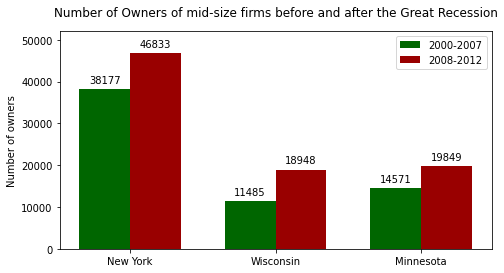

In [54]:
x = np.arange(3)  # the label locations
width = 0.35  # the width of the bars
fig,ax = plt.subplots()
rects1 = ax.bar(x - width/2, filtered_post['OWNPDEMP'], width, label='2000-2007',color='#006600')
rects2 = ax.bar(x + width/2, filtered_pre['OWNPDEMP'], width, label='2008-2012',color='#990000')
#set labels
ax.set_ylabel('Number of owners')
ax.set_title('Number of Owners of mid-size firms before and after the Great Recession',pad=15)
#set legend location
ax.legend(loc=0)
#set y axis limit
ax.set_ylim([0, 52000])
ax.set_xticks(x,filtered_pre['NAME'].values)
ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=4)
#make graph wider
fig.subplots_adjust(left=2,right=3)
plt.savefig('hellp')
plt.show()

# Create race group dataframe:

In [ ]:
race_groups_only = census_df[census_df['RACE_GROUP_LABEL']!='Total']

race_emps = race_groups_only[['RACE_GROUP_LABEL','RACE_GROUP','EMP']]

race_emps['EMP'] = pd.to_numeric(race_emps['EMP'])

race_emps = race_emps[(race_emps['RACE_GROUP_LABEL'] != 'Classifiable') & (race_emps['RACE_GROUP_LABEL'] != 'Unclassifiable') & (race_emps['RACE_GROUP_LABEL'] != 'Nonminority') & (race_emps['RACE_GROUP_LABEL'] != 'Minority') & (race_emps['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]

avg_num_employees = race_emps.groupby(by='RACE_GROUP_LABEL').mean()
avg_num_employees.plot.pie(subplots=True,labeldistance=None,autopct='%.2f%%',pctdistance=1.2,figsize=(8,8))
plt.legend(loc=3)
plt.title('Percentage of Employees by Race')

## Race vs. Annual payments

In [ ]:
race_payann = race_groups_only[['RACE_GROUP_LABEL','RACE_GROUP','PAYANN']]

race_payann['PAYANN'] = pd.to_numeric(race_payann['PAYANN'])

race_payann = race_payann[(race_payann['RACE_GROUP_LABEL'] != 'Classifiable') & (race_payann['RACE_GROUP_LABEL'] != 'Unclassifiable') & (race_payann['RACE_GROUP_LABEL'] != 'Nonminority') & (race_payann['RACE_GROUP_LABEL'] != 'Minority') & (race_payann['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]

avg_pay_by_race = race_payann.groupby('RACE_GROUP_LABEL').mean()

race_groups = list(avg_pay_by_race.index)

avg_pay_by_race['normalized_avg_pay'] = normalization(race_groups, list(avg_pay_by_race.values))
avg_pay_by_race['Race Group'] = race_groups

avg_pay_by_race.plot.barh(y='normalized_avg_pay',x='Race Group',legend=None, color= ["b",'orange','g','r','purple'])
plt.xlabel('Avg. Annual Pay rate ($1000s)')
plt.ylabel('Race Group')
plt.title('Average Annual Pay Rate ($1000s) by Race - 2018')

## Race vs. Total Sales (\$)

In [ ]:
race_sales = race_groups_only[['RACE_GROUP_LABEL','RACE_GROUP','RCPPDEMP']]

race_sales['RCPPDEMP'] = pd.to_numeric(race_sales['RCPPDEMP'])

race_sales = race_sales[(race_sales['RACE_GROUP_LABEL'] != 'Classifiable') & (race_sales['RACE_GROUP_LABEL'] != 'Unclassifiable') & (race_sales['RACE_GROUP_LABEL'] != 'Nonminority') & (race_sales['RACE_GROUP_LABEL'] != 'Minority') & (race_sales['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]

avg_total_sales_by_race = race_sales.groupby('RACE_GROUP_LABEL').mean()

avg_total_sales_by_race['normalized_avg_sales'] = normalization(race_groups, list(avg_total_sales_by_race.values))

avg_total_sales_by_race['Race Group'] = list(avg_total_sales_by_race.index)

avg_total_sales_by_race.plot.barh(y='normalized_avg_sales', x='Race Group', legend=None)
plt.ylabel('Race Group')
plt.xlabel('Avg. Total Sales ($1000) in a year')
plt.title('Average Total Sales ($1000) by Race - 2018')


### Test plots by race and sex

In [ ]:
census_df_dropped_race = census_df_dropped[(census_df_dropped['RACE_GROUP_LABEL'] != 'Classifiable') & (census_df_dropped['RACE_GROUP_LABEL'] != 'Unclassifiable') & (census_df_dropped['RACE_GROUP_LABEL'] != 'Nonminority') & (census_df_dropped['RACE_GROUP_LABEL'] != 'Minority') & (census_df_dropped['RACE_GROUP_LABEL'] != 'Equally minority/nonminority')]
census_df_dropped_race['EMP'] = census_df_dropped_race['EMP'].astype(int)
avg_num_of_employee_race = census_df_dropped_race.groupby(by='RACE_GROUP_LABEL').mean()
avg_num_of_employee_sex = census_df_dropped_race.groupby(by='SEX_LABEL').mean()
avg_num_of_employee_race.plot.bar()
avg_num_of_employee_sex.plot.bar()

In [ ]:
census_df_dropped_sex = census_df_dropped[(census_df_dropped['SEX_LABEL'] != 'Unclassifiable') & (census_df_dropped['SEX_LABEL'] != 'Total') & (census_df_dropped['SEX_LABEL'] != 'Classifiable')]
census_df_dropped_sex['EMP'] = census_df_dropped_sex['EMP'].astype(int)
avg_num_of_employee_sex = census_df_dropped_sex.groupby(by='SEX_LABEL').mean()
avg_num_of_employee_sex.plot.bar()

# Annual Pay by Sex

In [ ]:
census_df_dropped_sex['PAYANN'] = census_df_dropped_sex['PAYANN'].astype(int)
avg_annual_pay_sex = census_df_dropped_sex.groupby(by='SEX_LABEL').mean()

In [ ]:
AAPSG = avg_annual_pay_sex.plot(title = 'Average Annual Pay by Sex', kind='barh')
AAPSG.set_xlabel('Annual Pay ($)')
AAPSG.set_ylabel('Sex')
desc_annual_pay_sex = census_df_dropped_sex.groupby('SEX_LABEL').describe()
plt.boxplot(desc_annual_pay_sex)
plt.show()

# Annual Pay by Company Size

In [ ]:
census_df_dropped_company_size = census_df_dropped[(census_df_dropped['EMPSZFI_LABEL'] != 'All firms')]
census_df_dropped_company_size['PAYANN'] = pd.to_numeric(census_df_dropped_company_size['PAYANN'])
avg_annual_pay_company_size = census_df_dropped_company_size.groupby('EMPSZFI_LABEL').mean()

In [ ]:
AAPCSG = avg_annual_pay_company_size.plot(title = 'Average Annual Pay by Company Size', kind='barh')
AAPCSG.set_xlabel('Annual Pay ($)')
AAPCSG.set_ylabel('Company Size')
plt.show()

In [ ]:
desc_annual_pay_company_size = census_df_dropped_company_size.groupby('EMPSZFI_LABEL').describe()
plt.boxplot(desc_annual_pay_company_size)
plt.title('Annual Pay by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Annual Pay (in millions of $)')
plt.show()

# Annual Pay by Industry

In [ ]:
census_df_dropped_industry = census_df_dropped[(census_df_dropped['NAICS2017_LABEL'] != 'Total for all sectors')]
census_df_dropped_industry['PAYANN'] = pd.to_numeric(census_df_dropped_industry['PAYANN'])
avg_annual_pay_industry = census_df_dropped_industry.groupby('NAICS2017_LABEL').mean()

In [ ]:
AAPIG = avg_annual_pay_industry.plot(title = 'Average Annual Pay by Industry', kind='barh')
AAPIG.set_xlabel('Annual Pay ($)')
AAPIG.set_ylabel('Industry Name')
plt.show()

# Race - Geolocation 

In [ ]:
tk_cut = census_df_state[["NAME","RACE_GROUP_LABEL","VET_GROUP_LABEL"]]
tk_races_specific = tk_cut[(tk_cut['RACE_GROUP_LABEL'] != 'Classifiable') & (tk_cut['RACE_GROUP_LABEL'] != 'Unclassifiable') & (tk_cut['RACE_GROUP_LABEL'] != 'Nonminority') & (tk_cut['RACE_GROUP_LABEL'] != 'Minority') & (tk_cut['RACE_GROUP_LABEL'] != 'Equally minority/nonminority') & (tk_cut['RACE_GROUP_LABEL'] != 'Total')]
tk_races_geo = tk_races_specific.drop("VET_GROUP_LABEL",axis=1)
tk_geo_racesgrouped = tk_races_geo.groupby('NAME', sort=False)['RACE_GROUP_LABEL'].value_counts()

In [ ]:
# Minnesota
mn_plot = tk_geo_racesgrouped["Minnesota"].plot(kind='barh', title='Minnesota Survey Counts by Race', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))

In [ ]:
#Wisconsin
wi_plot = tk_geo_racesgrouped["Wisconsin"].plot(kind='barh', title='Wisconsin Survey Counts by Race', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))

In [ ]:
#Washington D.C.
dc_plot = tk_geo_racesgrouped["District of Columbia"].plot(kind='barh', title='District of Columbia Survey Counts by Race', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))

In [ ]:
comp_plot = tk_geo_racesgrouped[["Minnesota", "Wisconsin", "District of Columbia"]].plot(kind='barh', title='Comparative Survey Counts by Race (MN, WI, DC)', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))

# Veteran Group - Geolocation

In [ ]:
tk_vet_specific = tk_cut[(tk_cut['VET_GROUP_LABEL'] != 'Classifiable') & (tk_cut['VET_GROUP_LABEL'] != 'Unclassifiable')]
tk_vet_geo = tk_vet_specific.drop("RACE_GROUP_LABEL", axis=1)
tk_geo_vetgrouped = tk_vet_geo.groupby("NAME", sort=True)["VET_GROUP_LABEL"].value_counts(sort=True)


In [ ]:
#Minnesota
mn_plot = tk_geo_vetgrouped["Minnesota"].plot(kind='barh', title='Minnesota Survey Counts by Veteran Status', ylabel='Count of Surveys', xlabel='Veteran Status', figsize=(6, 5))

In [ ]:
#Wisconsin
wi_plot = tk_geo_vetgrouped["Wisconsin"].plot(kind='barh', title='Winsconsin Survey Counts by Veteran Status', ylabel='Count of Surveys', xlabel='Veteran Status', figsize=(6, 5))

In [ ]:
# D.C
dc_plot = tk_geo_vetgrouped["District of Columbia"].plot(kind='barh', title='District of Columbia Survey Counts by Veteran Status', ylabel='Count of Surveys', xlabel='Veteran Status', figsize=(6, 5))

In [ ]:
comp_plot = tk_geo_vetgrouped[["Minnesota", "Wisconsin", "District of Columbia"]].plot(kind='barh', title='Comparative Survey Counts by Veteran Status (MN, WI, DC)', ylabel='Count of Surveys',
         xlabel='Race', figsize=(6, 5))